<a href="https://www.kaggle.com/agnishwarbagchi/fire-detection?scriptVersionId=89296252" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [49]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
fire_images_path = r"../input/fire-dataset/fire_dataset/fire_images"
non_fire_images_path = r"../input/fire-dataset/fire_dataset/non_fire_images"

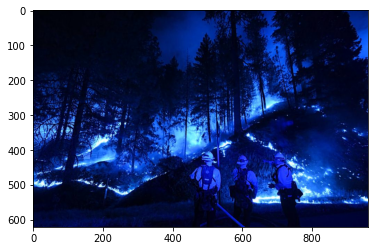

In [51]:
for img in os.listdir(fire_images_path):
    img_array = cv2.imread(os.path.join(fire_images_path,img))
    plt.imshow(img_array)
    plt.show()
    break

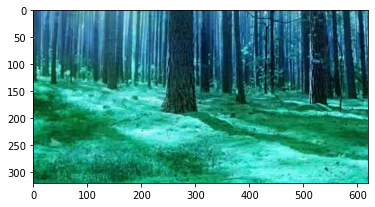

In [52]:
for img in os.listdir(non_fire_images_path):
    img_array = cv2.imread(os.path.join(non_fire_images_path,img))
    plt.imshow(img_array)
    plt.show()
    break

In [53]:
img_array.shape

(320, 620, 3)

In [54]:
data = []
IMG_SIZE = 300

def get_data(file_path,class_num, data):
    for img in os.listdir(file_path):
        try:
            img_array = cv2.imread(os.path.join(file_path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, class_num])
        except:
            pass
get_data(fire_images_path,1,data)
get_data(non_fire_images_path,0,data)

In [77]:
len(data)

998

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout


In [79]:
data_augmentation1 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(0.5),
])

data_augmentation2 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomContrast(0.2)
])

def apply_augmentation(data):
    for i in range(len(data)):
        if data[i][1] == 0:
            data.append([data_augmentation1(data[i][0]),0])
            data.append([data_augmentation2(data[i][0]),0])
apply_augmentation(data)
len(data)

1484

In [80]:
import random
random.shuffle(data)

In [81]:
X = []
y = []

for i in data:
    X.append(i[0])
    y.append(i[1])

In [82]:
X[0],y[0]

(array([[[ 0,  6, 61],
         [ 0,  6, 57],
         [ 0,  6, 53],
         ...,
         [ 0,  1,  5],
         [ 0,  1,  5],
         [ 0,  1,  5]],
 
        [[ 0,  7, 64],
         [ 0,  6, 59],
         [ 0,  5, 54],
         ...,
         [ 0,  1,  5],
         [ 0,  1,  5],
         [ 0,  1,  5]],
 
        [[ 1,  6, 66],
         [ 1,  6, 61],
         [ 2,  6, 57],
         ...,
         [ 0,  1,  5],
         [ 0,  1,  5],
         [ 0,  1,  5]],
 
        ...,
 
        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 0,  1,  1],
         [ 0,  1,  1],
         [ 0,  1,  2]],
 
        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 0,  1,  1],
         [ 0,  1,  1],
         [ 0,  1,  2]],
 
        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 0,  1,  1],
         [ 0,  1,  1],
         [ 0,  1,  2]]], dtype=uint8),
 1)

(array([729.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 755.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

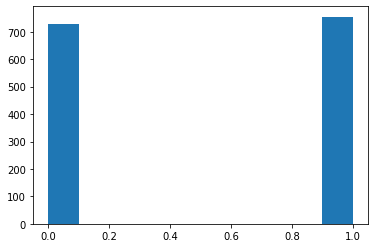

In [83]:
plt.hist(y)

In [84]:
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,3)
y = np.array(y)

In [85]:
X.shape, y.shape

((1484, 300, 300, 3), (1484,))

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1187, 300, 300, 3)
(148, 300, 300, 3)
(149, 300, 300, 3)


In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout

In [89]:
model = models.Sequential([
    
  layers.Conv2D(32, kernel_size = (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

    
  layers.Flatten(),
  layers.Dense(60, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 64)       

In [92]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Epoch 1/30
38/38 [==============================] - 3s 56ms/step - loss: 2.1859 - accuracy: 0.7784 - val_loss: 0.2634 - val_accuracy: 0.9060
Epoch 2/30
38/38 [==============================] - 2s 41ms/step - loss: 0.1431 - accuracy: 0.9511 - val_loss: 0.1439 - val_accuracy: 0.9597
Epoch 3/30
38/38 [==============================] - 2s 42ms/step - loss: 0.1711 - accuracy: 0.9351 - val_loss: 0.1493 - val_accuracy: 0.9530
Epoch 4/30
38/38 [==============================] - 2s 42ms/step - loss: 0.1305 - accuracy: 0.9579 - val_loss: 0.0960 - val_accuracy: 0.9530
Epoch 5/30
38/38 [==============================] - 2s 44ms/step - loss: 0.1033 - accuracy: 0.9697 - val_loss: 0.1184 - val_accuracy: 0.9530
Epoch 6/30
38/38 [==============================] - 2s 41ms/step - loss: 0.0759 - accuracy: 0.9705 - val_loss: 0.0699 - val_accuracy: 0.9664
Epoch 7/30
38/38 [==============================] - 2s 41ms/step - loss: 0.0573 - accuracy: 0.9773 - val_loss: 0.1397 - val_accuracy: 0.9530
Epoch 8/30
38

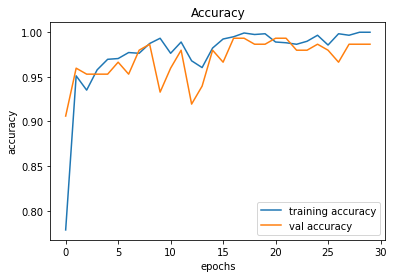

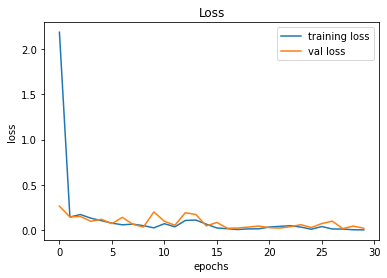

In [94]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [95]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 63ms/step - loss: 0.2506 - accuracy: 0.9527


[0.2506052851676941, 0.9527027010917664]

In [101]:
predictions = model.predict(X_test)

In [113]:
predictions[:5]

array([[7.0393212e-06],
       [9.9993336e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [114]:
predicted= []

for i in predictions:
    if i >0.5:
        predicted.append(1)
    else:
        predicted.append(0)
predicted[:5]

[0, 1, 1, 1, 1]

In [115]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

<AxesSubplot:>

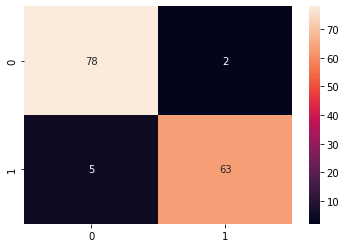

In [116]:
import seaborn as sn

sn.heatmap(cm,annot=True, fmt='d')

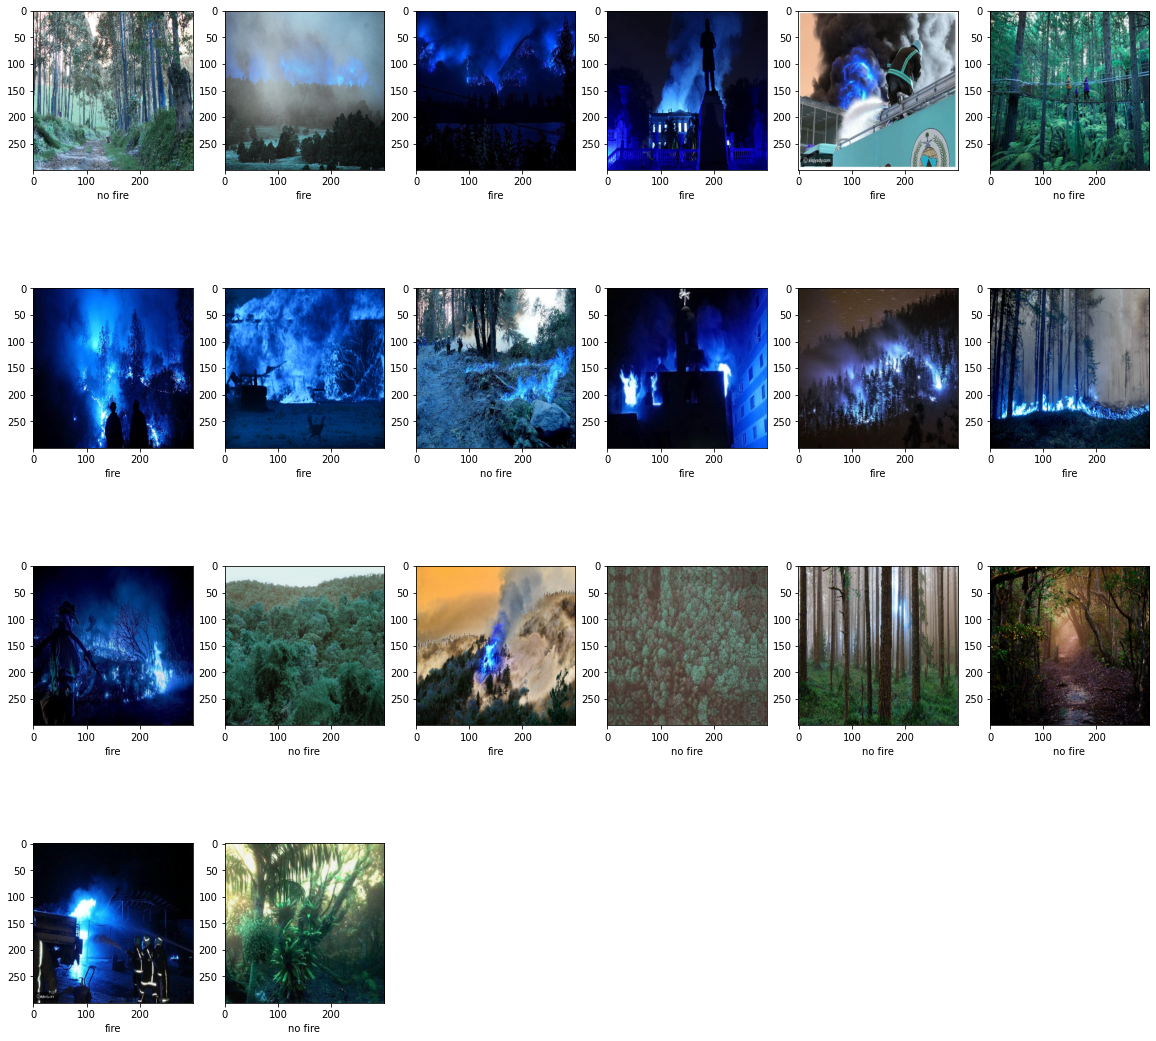

In [120]:
plt.figure(figsize=(20,40))

cat = ["no fire", "fire"]

for i in range(20):
    plt.subplot(8,6,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(cat[predicted[i]])